In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

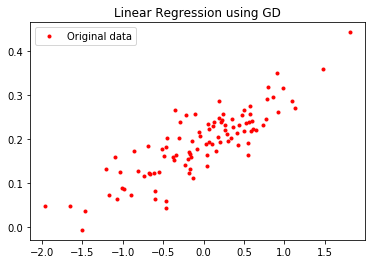

In [13]:
point_num = 100

x_data = np.random.normal(0, 0.66, size=point_num)
y_data = 0.1 * x_data + 0.2 + np.random.normal(0.0,0.04, size=point_num)

plt.plot(x_data, y_data, 'r.', label="Original data")
plt.title("Linear Regression using GD")
plt.legend() # 展示label
plt.show()

# 步骤
1. 定义训练参数, 定义学习模型y
2. 定义目标函数(损失函数)
3. 优化器, 学习率
4. 初始化变量
5. train

Step=0, Loss=0.088211, [Weight=0.527403 Bias=0.222309]
Step=1, Loss=0.026520, [Weight=0.327485 Bias=0.208794]
Step=2, Loss=0.008762, [Weight=0.220204 Bias=0.201842]
Step=3, Loss=0.003650, [Weight=0.162645 Bias=0.198112]
Step=4, Loss=0.002178, [Weight=0.131763 Bias=0.196110]
Step=5, Loss=0.001755, [Weight=0.115194 Bias=0.195036]
Step=6, Loss=0.001633, [Weight=0.106305 Bias=0.194460]
Step=7, Loss=0.001598, [Weight=0.101535 Bias=0.194151]
Step=8, Loss=0.001587, [Weight=0.098976 Bias=0.193985]
Step=9, Loss=0.001585, [Weight=0.097603 Bias=0.193896]
Step=10, Loss=0.001584, [Weight=0.096867 Bias=0.193848]
Step=11, Loss=0.001583, [Weight=0.096472 Bias=0.193823]
Step=12, Loss=0.001583, [Weight=0.096259 Bias=0.193809]
Step=13, Loss=0.001583, [Weight=0.096146 Bias=0.193802]
Step=14, Loss=0.001583, [Weight=0.096085 Bias=0.193798]
Step=15, Loss=0.001583, [Weight=0.096052 Bias=0.193796]
Step=16, Loss=0.001583, [Weight=0.096034 Bias=0.193794]
Step=17, Loss=0.001583, [Weight=0.096025 Bias=0.193794]
St

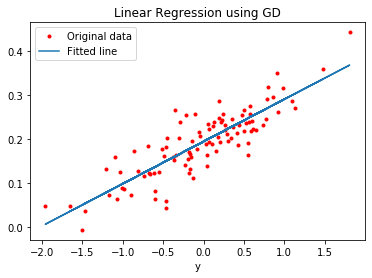

In [34]:
# 构建线性回归模型
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # 初始化权重 [-1.0, 1.0)
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# 定义损失函数 MSE
loss = tf.reduce_mean(tf.square(y - y_data))

# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(loss) # 最小化损失

# 定义保存日志的路径
path = "./log"
init = tf.global_variables_initializer()#??

# 创建会话
with tf.Session() as sess:
    # 初始化数据流图中的所有变量
    sess.run(init)
    writer = tf.summary.FileWriter(path, sess.graph)
    # 训练 步数
    for step in range(20): #?? xrange
        sess.run(train) # 优化每一步
        print("Step=%d, Loss=%f, [Weight=%f Bias=%f]" \
              % (step, sess.run(loss), sess.run(W), sess.run(b)))

    # 绘制样本
    plt.plot(x_data, y_data, 'r.', label="Original data")
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label="Fitted line")
    plt.title("Linear Regression using GD")
    plt.legend() # 展示label
    plt.xlabel('x')
    plt.xlabel('y')
    plt.show()